In [1]:
%load_ext tikzmagic
%matplotlib inline

# 카테고리분포와 다항분포

## 카테고리분포

카테고리분포는 베르누이분포의 확장판이다. 베르누이분포는 두 가지의 값만 가질 수 있지만 카테고리분포는 $1,2,\ldots,K$까지 $K$($K>0$)개의 값을 가질 수 있다. 예를 들어 주사위를 던져 나오는 숫자는 $K=6$인 카테고리분포를 따른다고 할 수 있다. 

확률변수 $x$가 카테고리분포를 따르는 경우 다음과 같이 표시한다.

$$ x \sim \text{Cat}(x) $$

위 식에서 $\text{Cat}(x)$은 카테고리분포의 확률질량함수를 가리키는 기호다.

### 카테고리분포의 확률분포함수

카테고리분포의 확률질량함수 $\text{Cat}(x)$의 수식은 다음과 같다.

$$
\begin{split}
\begin{align}
\text{Cat}(x;\mu_1,\mu_2,\ldots,\mu_K) = 
\begin{cases} 
\mu_1 & \text{if }x=1, \\
\mu_2 & \text{if }x=2, \\
\vdots & \vdots \\
\mu_K & \text{if }x=K, \\
\end{cases}
\end{align}
\end{split}
$$

카테고리분포는 각각 $1,2,\ldots,K$값이 나올 확률을 나타내는 $\mu_1,\mu_2,\ldots,\mu_K$라는 $K$개의 모수를 가진다. 예를 들어 공정한 주사위의 경우에는 모든 모수값이 $\frac{1}{6}$이 된다.

$$ \text{공정한 주사위의 카테고리모수}: \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 = \mu_6 = \dfrac{1}{6} $$

어떤 경우에도 $\mu_1,\mu_2,\ldots,\mu_K$를 모두 더하면 1이 되어야 한다. 이 제한조건을 수식으로 표현하면 다음과 같다.

$$ \sum_{i=1}^{K}\mu_i = 1 $$

카테고리분포의 확률질량함수 $\text{Cat}(x)$도 베르누이분포처럼 하나의 수식으로 표현하는 방법이 있는데 이렇게 하려면 카테고리분포가 생성하는 값이 $1,2,\ldots,K$와 같은 정수값이 아니라 다음과 같이 0과 1로 이루어진 벡터값

$$ x = (x_1, x_2, \ldots, x_K) $$

으로 풀어써야 한다. 예를 들어 주사위와 같이 $K=6$인 카테고리분포는 다음과 같은 값을 가진다고 가정한다.

\begin{split} 
\begin{align}
\begin{aligned}
x = 1  \;\; & \rightarrow & \;\; x = (1, 0, 0, 0, 0, 0) \\
x = 2  \;\; & \rightarrow & \;\; x = (0, 1, 0, 0, 0, 0) \\
x = 3  \;\; & \rightarrow & \;\; x = (0, 0, 1, 0, 0, 0) \\
x = 4  \;\; & \rightarrow & \;\; x = (0, 0, 0, 1, 0, 0) \\
x = 5  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 1, 0) \\
x = 6  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 0, 1) \\
\end{aligned}
\end{align}
\end{split}

이렇게 정수 범주값을 0과 1로 이루어진 벡터값으로 바꾸는 작업을 <b>원핫인코딩(one-hot encoding)</b>이라고 한다. 원핫인코딩을 하게되면 카테고리분포의 확률질량함수 $\text{Cat}$은 다음과 같이 표시한다. 

$$ \text{Cat}(x_1, x_2, \dots, x_K;\mu_1, \dots, \mu_K) $$

이렇게 원핫인코딩을 한 경우에는 카테고리분포의 확률질량함수를 다음과 같은 간단한 수식으로 표현할 수 있다.

$$ \text{Cat}(x_1, x_2, \dots, x_K;\mu_1, \dots, \mu_K) = \mu_1^{x_1} \mu_2^{x_2}  \cdots \mu_K^{x_K}  =  \prod_{k=1}^K \mu_k^{x_k} $$

### 카테고리분포의 시뮬레이션

scipy 패키지의 stats 서브패키지는 카테고리분포를 시뮬레이션할 수 있는 별도의 클래스를 제공하지 않지만 다음에 설명할 다항분포를 시뮬레이션할 수 있는 클래스 `multinomial`를 제공한다. 이 클래스에서 인수 `n`을 1로 설정하면 카테고리분포를 시뮬레이션할 수 있다. 

예를 들어 공정한 주사위의 눈금을 나타내는 카테고리분포를 시뮬레이션해보자. 이 카테고리분포의 모수는 다음과 같다. 

$$K=6$$

$$ \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 = \mu_6 = \dfrac{1}{6} $$

In [2]:
from scipy.stats import multinomial

K = 6
mu = np.ones(K) / float(K)
x = multinomial(n=1, p=mu)
x

`multinomial` 클래스의 `pmf` 메소드는 확률질량함수를 계산한다. 다만 확률질량함수의 입력값으로는 원핫인코딩된 값을 넣어야 하므로 pandas 패키지의 `get_dummies` 함수를 사용하여 원핫인코딩을 해준다.

In [3]:
xx = np.arange(K)
xx

array([0, 1, 2, 3, 4, 5])

In [4]:
import pandas as pd

xx_ohe = pd.get_dummies(xx)
xx_ohe

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [5]:
pmf = x.pmf(xx_ohe.values)
pmf

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

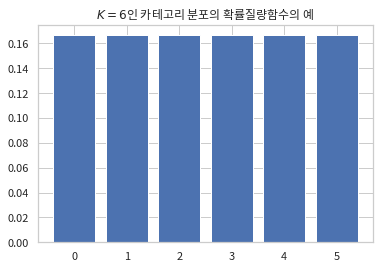

In [6]:
plt.bar(xx, pmf)
plt.title("$K=6$인 카테고리 분포의 확률질량함수의 예")
plt.show()

`rvs` 메서드를 사용하면 시뮬레이션을 통해 표본을 측정할 수 있다. 결과는 원핫인코딩 형식으로 나온다.

In [7]:
import numpy as np

np.random.seed(0)

samples_ohe = x.rvs(60)
samples_ohe[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0]])

원핫인코딩 형식의 값은 numpy의 `argmax` 함수를 이용하여 카테고리 번호로 바꿀 수 있다.

In [8]:
samples = np.argmax(samples_ohe, axis=1)
samples[:10]

array([5, 2, 0, 4, 3, 1, 0, 2, 3, 3])

이 결과는 seaborn 패키지의 `countplot` 함수로 시각화할 수 있다. 원래 공정한 주사위의 데이터는 모든 범주값의 개수가 같아야 하지만 실제로는 다음과 같이 오차가 발생한다.

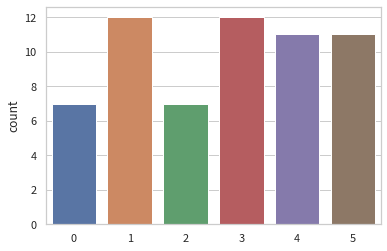

In [9]:
sns.countplot(samples)
plt.show()

### 카테고리분포의 예

범주형 데이터에서 범주의 종류가 3개 이상인 것은 카테고리분포를 따른다. 예를 들어 팁 데이터에서 요일을 나타내는 day 필드는 'Thur', 'Fri', 'Sat', 'Sun' 이렇게 4가지 값을 가지는 범주형 데이터이므로 카테고리분포를 따른다. day 필드의 카테고리분포는 다음과 같이 시각화할 수 있다.

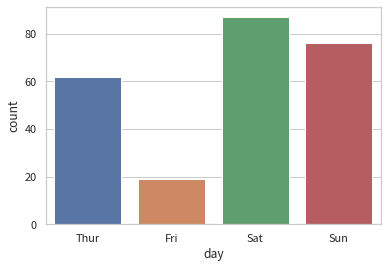

In [10]:
tips = sns.load_dataset("tips")

sns.countplot(x="day", data=tips)
plt.show()

### 카테고리분포의 모수추정

카테고리분포의 $K$개의 모수 $\mu_1,\mu_2,\ldots,\mu_K$의 값은 다음과 같이 추정한다.

$$
\hat\mu_1 = \dfrac{N_1}{N}, \,
\hat\mu_2 = \dfrac{N_2}{N}, \,
\cdots, \,
\hat\mu_K = \dfrac{N_K}{N},
$$

위 식에서 $N_1, N_2, \ldots, N_K$는 각각 $1, 2, \ldots, K$번째 범주값이 나온 횟수이고 $N$은 전체 표본 데이터의 개수다.

$$ N = N_1 + N_2 + \cdots + N_K $$

위에서 시뮬레이션으로 구한 공정한 주사위 데이터의 경우에는 다음과 같은 모수 추정치가 나온다.  공정한 주사위를 시뮬레이션한 것이므로 원래는 모든 모수가 $\frac{1}{6}\approx 0.1667$ 값을 가져야 한다. 하지만 측정 오차로 인해 이와 다른 값을 가지는 것을 알 수 있다.

In [11]:
import pandas as pd

pd.value_counts(samples, normalize=True)

3    0.200000
1    0.200000
5    0.183333
4    0.183333
2    0.116667
0    0.116667
dtype: float64

팁데이터의 day 필드 데이터에 대해서도 이 방식으로 모수를 추정하면 다음과 같다. 

In [12]:
tips.day.value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

### 카테고리분포의 모수검정

위 방법으로 추정한 카테고리분포의 모수는 오차가 있을 수 있다. 따라서 원래는 우리가 생각하는 모수값을 가졌지만(귀무가설), 측정오차로 인해 추정치가 나왔을 가능성이 있다. 이 가능성을 검증하기 위해 카테고리분포의 모수검정을 할 수 있다. 

카테고리분포의 모수검정 중 가장 일반적으로 사용되는 검정은 <b>일원카이제곱검정(one-way chi-square test)</b>이다. scipy 패키지의 stats 서브패키지는 일원카이제곱검정을 하는 `chisquare` 함수를 제공한다. 

위에서 시뮬레이션으로 구한 공정한 주사위의 데이터에 대해 모든 모수값이 $\frac{1}{6}$이라는 귀무가설을 검정하는 방법은 다음과 같이 첫번째 인수로 측정 데이터를 넣고 두번째 데이터로 귀무가설에 정확히 따르는 측정값을 넣는다. 사실 공정한 주사위의 경우처럼 모든 모수값이 같은 경우에는 두번째 인수를 생략해도 된다.

In [13]:
from scipy.stats import chisquare

samples_count_real = pd.value_counts(samples)
samples_count_null = [10, 10, 10, 10, 10, 10]

chisquare(samples_count_real, samples_count_null)

Power_divergenceResult(statistic=2.8, pvalue=0.7307864865887586)

유의확률이 73%가 넘으므로 이 귀무가설을 기각하지 못하고 채택한다. 즉, 공정한 주사위가 아니라 할 수 없다. 

팁 데이터를 보면 목/금/토/일의 값이 각각 다르게 나왔다. 만약 이 결과는 측정오차때문이고 실제로 고객이 방문하는 비율은 모든 요일이 같은지를 알아보는 검정을 하려면 다음과 같은 코드를 사용한다. 

In [14]:
chisquare(tips.day.value_counts())

Power_divergenceResult(statistic=43.704918032786885, pvalue=1.7434891890557612e-09)

유의확률이 아주 작으므로 모든 요일에 대해 고객 방문비율이 같다는 귀무가설은 기각한다. 즉, 요일에 따른 고객 방문율 차이가 존재하는 것이 사실이라는 결론을 얻는다.

## 다항분포

카테고리분포가 베르누이분포의 확장판이듯이 다항분포는 이항분포의 확장판이다. 다항분포(multinomial distribution)는 카테고리분포의 표본값을 $N$개 측정하였을 때 각 범주값이 나온 횟수를 표본값으로 가진다. 

어떤 확률변수 $x$가 다항분포를 따를 때 다음과 같이 표시한다.

$$ x \sim \text{Mult}(x) $$

주사위를 한 번 던질 때 나오는 값은 카테고리분포를 따르므로 주사위를 $N$번 던져서 각각의 면이 나오는 횟수는 다항분포가 된다.